[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/096_ml_unsupervised/096_ml_unsupervised.ipynb)

# Laboratorio 6 (Aprendizaje no supervisado) Grupo 1
 <h3>Implementacion del clustering haciendo uso del algoritmo K-Means.<h3>
 <HR>
 <h3>
  NOMBRES: 
  
  * POLO ORELLANA BRAYAN SIMON
  * LOPEZ CHIRI DIMAR GABRIEL
  * SALAZAR SANTOS EFRAIN 
  
  <br>
  CARRERA: INGENIERIA DE SISTEMAS
  <BR>
  FECHA: 02/05/2024 <BR>

  * [Enlace de invitacion para ser colaborador](https://github.com/bspoloo/SIS420-012024/invitations)
  
  * [Enlace al git hub](https://github.com/bspoloo/SIS420-012024/tree/main/Laboratorios/Laboratorio%206)

 <h3>

Para el laboratorio hizo uso del dataset `smoke_detection_iot.csv` para aplpicar el modelo de **clustering** usando el algoritmo de **k-means**.

El enlace al dataset es [Smoke Detection Dataset](https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset).

El archivo `csmoke_detection_iot.csv` cuenta con un conjunto de datos etectar el humo normalmente como indicador de incendio. Los detectores de humo generalmente están alojados en carcasas de plástico, generalmente con forma de disco de aproximadamente 150 milímetros (6 pulgadas) de diámetro y 25 milímetros (1 pulgada) de espesor, pero la forma y el tamaño varían.


# ML - Aprendizaje No Supervisado

Si bien todos los ejemplos de *Machine Learning* que hemos visto hasta ahora en esta serie se han basado en aprendizaje supervisado (nuestros datos van acompañados de las etiquetas correspondientes, ejemplos de la tarea que queremos llevar a cabo) la mayoría de los datos no están etiquetados. 

Antes con esta problemática se tenia dos alternativas: 
* etiquetar datos manualmente (lo cual require de tiempo, esfuerzo y dinero en el caso de querer desarrollar sistemas reales)
* bien usar técnicas de aprendizaje no supervisado, o *Unsupervised Learning* en inglés.

## Clustering

De entre las diferentes técnicas de aprendizaje no supervisado, el *Clustering* es una de las más usadas. Este técnica consiste en identificar aquellas muestras similares del conjunto de datos y asignarlas a un *cluster*, o grupo. Esto permite aplicaciones tales como: 
* segmentación de clientes.
* análisis de datos.
* reducción de la dimensionalidad.
* detección de anomalías.
* aprendizaje semi-supervisado.
* motores de búsqueda.
* semgentación de imágenes.

### K-Means

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

#### Importamos las librerisa necesarias

In [254]:
from sklearn.datasets import make_blobs #Para generar conjuntos de datos simulados con una distribución específica
import numpy as np #para el manejo de matrices y vectores

# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat


import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
# tells matplotlib to embed plots within the notebook
#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split
%matplotlib inline

#### Generacion del conjunto de datos simulado
Generamos un conjunto de datos simulado con cinco clústeres utilizando la función make_blobs. Cada clúster tiene un centro y una desviación estándar específicos, y el conjunto de datos contiene un total de 2000 muestras.

In [299]:
#una matriz NumPy que contiene las coordenadas de los centros de los clústeres. Cada fila representa las coordenadas de un centro de clúster en un espacio de dos dimensiones.
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.3]])

#una matriz NumPy que contiene las desviaciones estándar de los clústeres.
blob_std = np.array([0.2, 0.5, 0.7])

#para generar un conjunto de datos X y las etiquetas correspondientes y.
X, y = make_blobs(n_samples=3000, 
                  centers=blob_centers,
                  cluster_std=blob_std, 
                  random_state=7)

X.shape

(3000, 2)

### visualizacion del conjunto de datos de clústeres
visualizamos el conjuntos de datos de clústeres en un espacio bidimensional. 

Creamos una funcion para graficar el cual toma como parametros nuestro conjuento de datos **X** y **y**:

In [300]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Hacemos el uso de la funcion, donde introducimos solo X, ya que y es y=none:

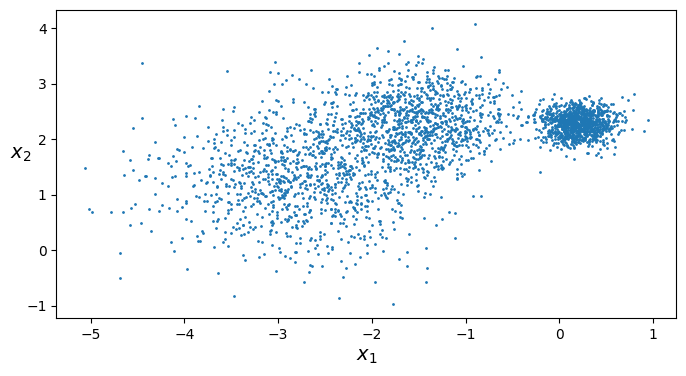

In [301]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### Uso de K-Means

KMeans es un algoritmo de clustering que se utiliza para agrupar datos en grupos (llamados clústeres) basándose en características similares. Es uno de los algoritmos de clustering más comunes y ampliamente utilizados en el aprendizaje automático.

En *Scikit-Learn* puedes usar el objeto [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), indicando el número de clusters deseado.  

numero de labels es: 3000


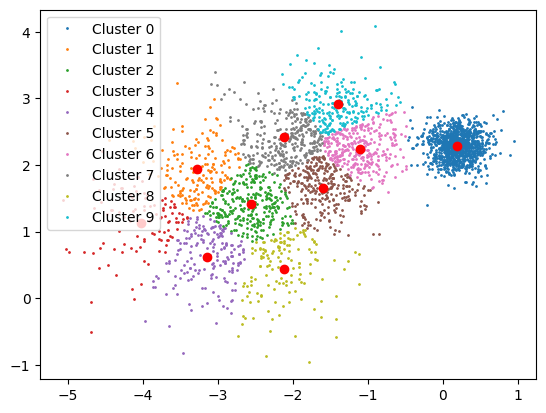

In [304]:
from sklearn.cluster import KMeans

k = 10

#especifica el número de clústeres que se desean y fija la semilla para la reproducibilidad de los resultados.
kmeans = KMeans(n_clusters=k, random_state=42)

#Ajusta el modelo KMeans a los datos X y predice los clústeres para cada muestra en X utilizando el método fit_predict(), donde introducimos el conjunto de datos X
y_pred = kmeans.fit_predict(X)

y_pred.shape

for i in range(k):
    plt.plot(X[y_pred == i, 0], X[y_pred == i, 1], 'o', label="Cluster %d" % i, markersize=1)
    plt.plot(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], 'o', color='red')
    plt.legend()

print("numero de labels es:",len(kmeans.labels_))

#### Muestra de los centroides

Mostramos los centroides de los clústeres obtenidos después de ajustar el modelo KMeans a los datos.


In [305]:
kmeans.cluster_centers_

array([[ 0.1926208 ,  2.28495523],
       [-3.27216774,  1.93610572],
       [-2.55905003,  1.41272941],
       [-4.02565611,  1.12374852],
       [-3.13893621,  0.61934098],
       [-1.59851953,  1.65645082],
       [-1.10431091,  2.24403544],
       [-2.11238977,  2.41231288],
       [-2.11565702,  0.43749329],
       [-1.39470761,  2.92239016]])

Una vez tenido el modelo KMeans creamos un array de prueba y predecimos los clústeres para cada muestra en X utilizando el método fit_predict():

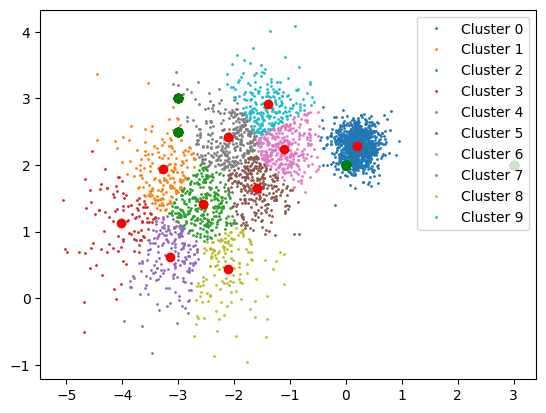

In [306]:
X_prueba = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
y_prueba = kmeans.predict(X_prueba)

for i in range(k):
    plt.plot(X[y_pred == i, 0], X[y_pred == i, 1], 'o', label="Cluster %d" % i, markersize=1)
    plt.plot(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], 'o', color='red')
    plt.plot(X_prueba[:, 0], X_prueba[:, 1], 'o', color='green')
    plt.legend()
    


In [307]:
i = 0
for y in y_prueba:
    print("Para", X_prueba[i], "el cluster es", y)
    i = i +1

Para [0. 2.] el cluster es 0
Para [3. 2.] el cluster es 0
Para [-3.  3.] el cluster es 7
Para [-3.   2.5] el cluster es 1


### Funciones para graficar los graficar
* datos
* Centroides
* límites de decisión de la trama

In [308]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

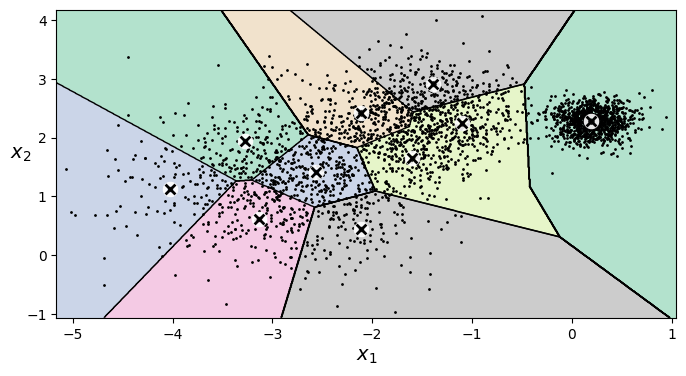

In [309]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

En lugar de asignar un grupo a cada muestra (*hard clustering*) se le puede asignar una puntuación (*soft clustering*) en función de su distancia al centroide.

El método kmeans.transform(X_prueba) calcula las distancias de cada muestra en el conjunto de datos de prueba (X_prueba) a los centroides de los clústeres encontrados por el modelo KMeans.

Cuando aplicas este método, obtendrás una matriz en la que cada fila corresponde a una muestra en X_prueba y cada columna corresponde a la distancia de esa muestra a uno de los centroides de los clústeres.

In [311]:
kmeans.transform(X_prueba)

array([[0.34395094, 3.2727915 , 2.62557114, 4.11991794, 3.42916023,
        1.6350201 , 1.13095353, 2.15225288, 2.63010111, 1.67212826],
       [2.82180394, 6.27249317, 5.58998425, 7.08008902, 6.29227758,
        4.61133472, 4.11155948, 5.12898929, 5.34896008, 4.49046307],
       [3.27171462, 1.09815587, 1.6473812 , 2.13829139, 2.38470977,
        1.94146128, 2.04086245, 1.06453185, 2.71081227, 1.60716736],
       [3.19985497, 0.62614059, 1.17328352, 1.71640281, 1.88578409,
        1.63576365, 1.91289178, 0.89193102, 2.24410259, 1.65993286]])

Este algoritmo funciona asignando centroides de manera aleatoria y, de manera iterativa, asigna cada instancia a uno de ellos (el más cercano) tras lo cual se recalcula el centroide como el valor promedio de todas las instancias asignadas al grupo.

In [312]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="elkan", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="elkan", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='elkan', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

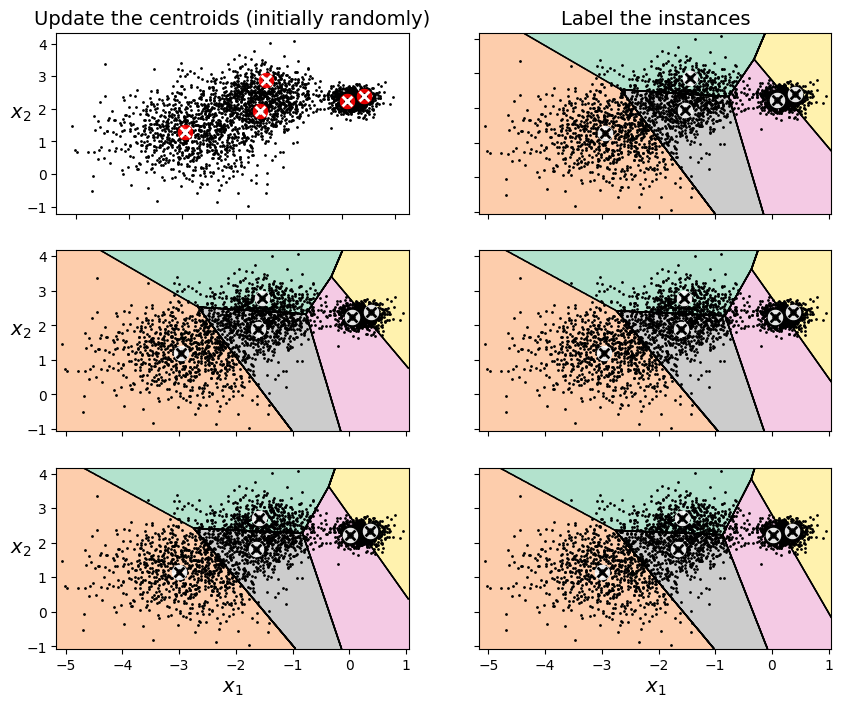

In [313]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

Esto implica que en función del estado inicial, el algoritmo puede llegar a una solución u otra.

In [314]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

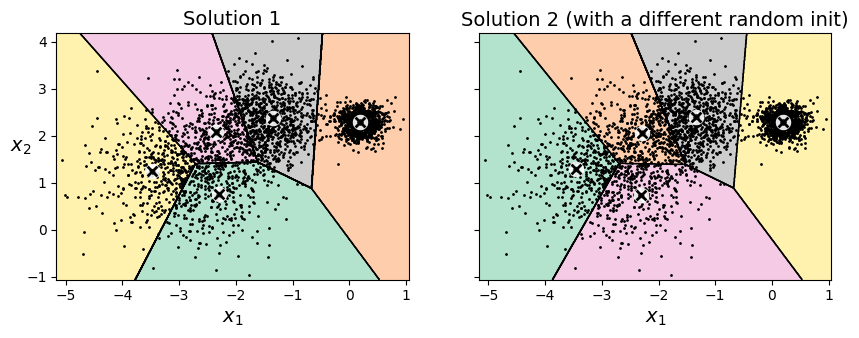

In [315]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="elkan", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="elkan", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece *Scikit-Learn* por defecto.

In [320]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="elkan", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=5, n_init=10,
       random_state=11)

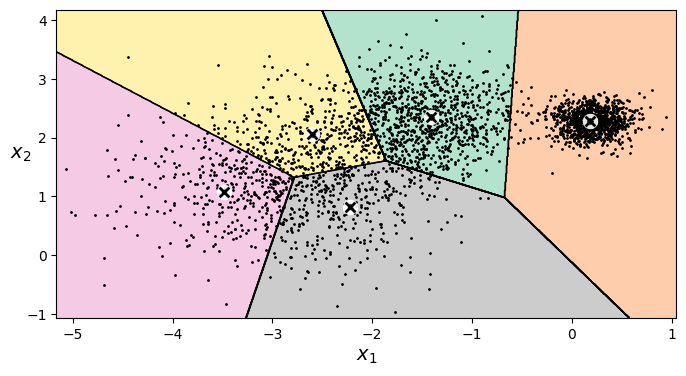

In [321]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

Otras mejoras al algoritmo de *K-Means* incluyen: *K-Means* acelerados (usado por *Scikit-Learn* por defecto y que evita algunos cálculos de distancias) y *mini-batch K-Means* (que puedes usarse si el dataset es tan grande que no cabe en memoria). Vamos a ver un ejemplo de este último caso con el dataset MNIST, para lo cual usaremos el objeto [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html?highlight=minibatchkmeans#sklearn.cluster.MiniBatchKMeans).

## clustering con el algoritmo K-Means

### Funcion para la creacion de lotes

El algoritmo de *mini-batch K-Means* es más rápido que *K-Means* normal, pero su precisión suele ser peor.

In [269]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

## Entrenamiento del modelo

donde calculamos el mejor modelo que es aquel con la menor inercia, donde la inercia es: ``aquella que indica que las muestras o datos están más cerca de los centroides de sus clústeres.``

In [322]:
from sklearn.cluster import MiniBatchKMeans

k = 20
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10 #Número de iteraciones en las que se evaluará la inercia del modelo KMeans para determinar la mejor inicialización.

best_kmeans = None #como None, que se utilizará para almacenar el mejor modelo KMeans encontrado durante las iteraciones.

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size) # con el número de clústeres k y el tamaño de la muestra inicial init_size.
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init) # usamos partialFit cuando los datos llegan en secuencias o lotes.

    minibatch_kmeans.sum_inertia_ = 0 #Inicializa la suma de la inercia del modelo KMeans.
    for iteration in range(n_iterations): # Iteramos n_veces para ajustar parcialmente el modelo KMeans con lotes de datos:
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_
#Compara la suma de la inercia del modelo actual con la mejor suma de la inercia encontrada hasta ahora y actualiza best_kmeans si el modelo actual tiene una suma de inercia menor.
    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

### Evaluacion del modelo
``best_kmeans.score(X_train)`` = Devuelve el opuesto de la inercia del modelo ajustado con respecto a los datos proporcionados. Esto significa que cuanto menor sea el valor devuelto por score, mejor será el ajuste del modelo a los datos.

In [323]:
best_kmeans.score(X)

-265.1466449938061

## Encontrando el número óptimo de grupos

Como hemos visto anteriormente, el número de grupos o *clusters* es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el *silhouette score*, que se basa en calcular el coeficiente de silueta (*silhouette coefficient*) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos.

El Silhouette Score proporciona una puntuación entre ``-1 y 1``. 
* Un valor cercano a 1 indica que los clústeres están bien separados, 
* Un valor -1 indica que las muestras pueden haber sido asignadas incorrectamente a los clústeres. 
* Un valor cercano a 0 indica que los clústeres pueden estar superpuestos.


In [324]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.4535015784020607

### Variando numero de cluster para encontrar un valor optimo

Calculando la métrica para diferentes números de *clusters* podemos encontrar el valor óptimo.

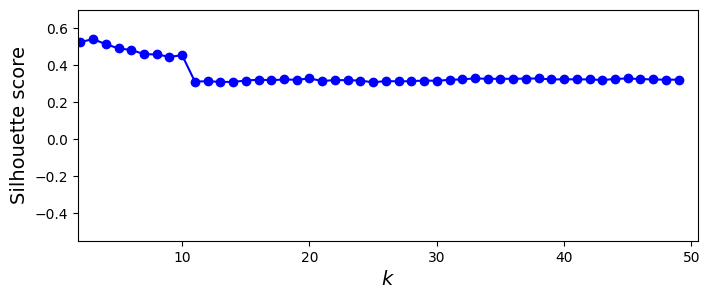

In [339]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 50)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]



plt.figure(figsize=(8, 3))
plt.plot(range(2, 50), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 50.5, -0.55, 0.7])
plt.show()

También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

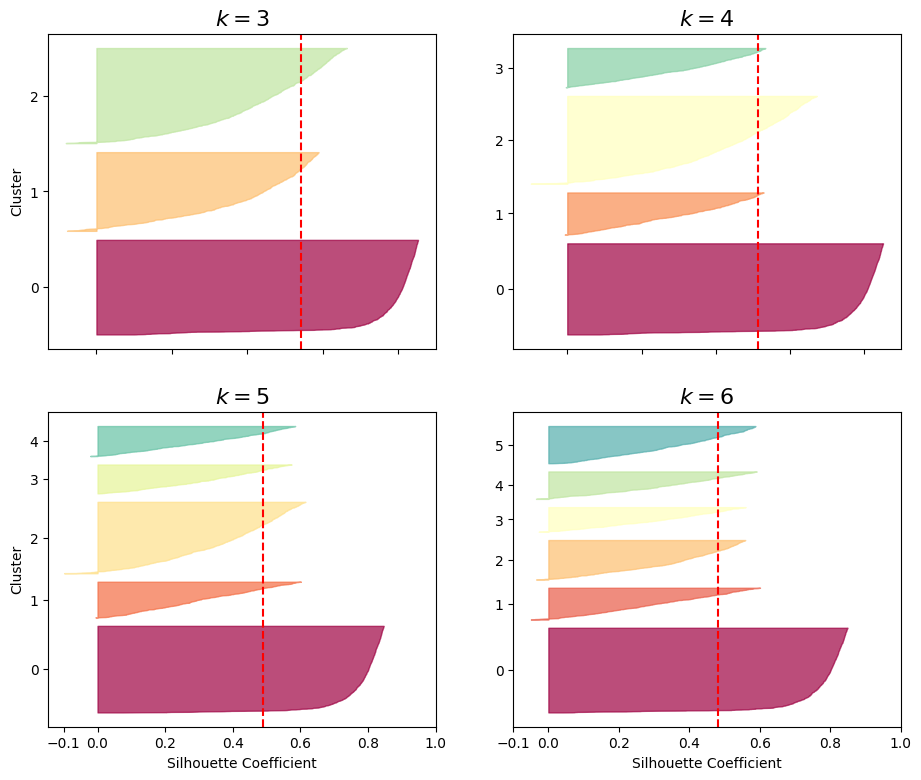

In [340]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

## K-Means para aprendizaje semi-supervisado.

El aprendizaje semi-supervisado (o *Semi-supervised Learning*) comprende el conjunto de técnicas que nos permiten entrenar modelos con datasets parcialmente etiquetados. En esta sección vamos a ver un ejemplo de como podemos aplicar esta técnica con el dataset MNIST y usando *K-Means*. Empezamos descargando el dataset.

#usamos X_train y y_train separados anteriormente:

### Carga del dataset

In [341]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

dataset = pd.read_csv('smoke_detection_iot.csv', delimiter=',')
dataset = dataset.drop(dataset.columns[0], axis=1)

dataset

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


#### Separamos 80% para entrenamiento y 20% para pruebas

In [345]:
from sklearn.model_selection import train_test_split


# usamos la libreria train_test_split que nos ayudara a separar el 80% y 20% de los datos.
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

#Separamos en X_test los datos, pero dropeando nuestra y que seria 'CARDIO_DISEASE'
X_test = test_dataset.drop(['Fire Alarm'], axis=1).values
#Separamos en y_test los datos, pero solo cargando la columna de 'CARDIO_DISEASE', ya que esa sera nuestra y
y_test = test_dataset['Fire Alarm'].values
m_test = len(y_test)

# tomamos train_dataset, seleccionamos las columnas para X_train y la columna 'CARDIO_DISEASE' para y_train
X_train = train_dataset.drop(['Fire Alarm'], axis=1).values
y_train = train_dataset['Fire Alarm'].values
m_train = len(y_train)

#para la aplicacion de la silueta
X_train_subset = X_train[:2000]


Imagina que el dataset no estuviese etiquetado, es decir, que tuviésemos solo los dígitos sin la clase (sólo $X$ y no $y$) y tampoco supiésemos cuantas clases diferentes tenemos. Lo primero que podríamos hacer es entrenar un modelo de *K-Means* con, por ejemplos, 50 grupos. De esta manera encontraremos aquellas imágenes más representativas de cada grupo.

en ``kmeans.fit_transform(X_train)`` transformamos X_train en una matriz de distancias a los centroides de los clústeres. X_digits_dist contendrá una matriz donde cada fila representará una instancia de X_train y cada columna representará la distancia de esa instancia a cada uno de los 50 centroides de los clústeres.

* la fila es la instancia de X_train.
* la columna es la distancia de esa instancia a cada centroide de los 50 clusteres.

#### Aplicacion de la silueta:

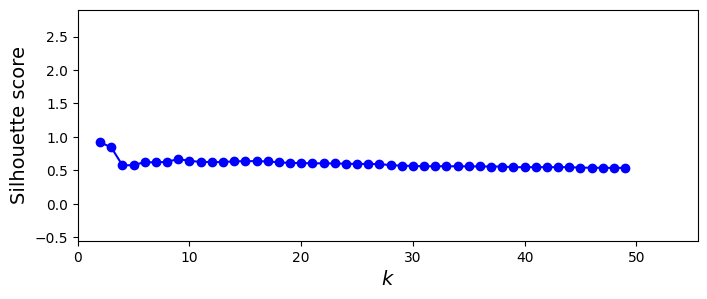

In [352]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_subset)
                for k in range(1, 50)]

silhouette_scores = [silhouette_score(X_train_subset, model.labels_)
                     for model in kmeans_per_k[1:]]


plt.figure(figsize=(8, 3))
plt.plot(range(2, 50), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([0, 55.5, -0.55, 2.9])
plt.show()

In [353]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

print(X_digits_dist.shape)

(50104, 2)


como cada fila, en cada columna es una distancia al centroide, entonces debemos escoger las menor columna de cada columna, dandonos como resultado teniendo los indices mas representativos:

In [354]:
idxs = np.argmin(X_digits_dist, axis=0)

print(idxs)
X_representative_digits = X_train[idxs]

print("Los valores mas representativos son", X_representative_digits)
print("La cantidad es: ",len(X_representative_digits))

[28047 48751]
Los valores mas representativos son [[1.65475143e+09 1.86560000e+01 5.08700000e+01 1.22800000e+03
  4.25000000e+02 1.29000000e+04 1.94310000e+04 9.38722000e+02
  1.66000000e+00 1.72000000e+00 1.14000000e+01 1.77700000e+00
  4.00000000e-02 1.80960000e+04]
 [1.65512848e+09 1.88740000e+01 4.18400000e+01 7.18500000e+03
  4.00000000e+02 1.30370000e+04 1.95080000e+04 9.36894000e+02
  3.90000000e-01 4.10000000e-01 2.69000000e+00 4.19000000e-01
  9.00000000e-03 4.17100000e+03]]
La cantidad es:  2


El siguiente paso consiste en anotar manualmente estas etiquetas (aquí haremos trampas ya que disponemos de dichas etiquetas).

In [355]:
y_representative_digits = y_train[idxs]
print(y_representative_digits)

[1 0]


Y entrenaremos un modelo clasificador:

In [356]:
from sklearn.linear_model import LogisticRegression

log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits)
log_reg2.score(X_test, y_test)

CPU times: total: 0 ns
Wall time: 7 ms


0.7740699345361648

#### Probando con datos aleatorias

Como puedes observar hemos obtenido una precisión de casi el $80%$ habiendo anotado simplemente 50 ejemplos, pero aquellas más representativas.

 Entrenar el mismo modelo con 50 ejemplos aleatorias nos daría peores resultados.

In [357]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(X_train[:50], y_train[:50])
log_reg.score(X_test, y_test)

CPU times: total: 0 ns
Wall time: 11 ms


0.9609612007025388

Esto pone de manifiesto que a la hora de entrenar modelos de ML no es tan importante la cantidad de datos, sino la calidad.

Ahora que tenemos un clasificador, podemos usarlo para anotar de manera automática el resto de imágenes. Para ello asignaremos, en cada grupo, la misma etiqueta a todas las muestras que la muestra representativa.

In [358]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

Creamos un nuevo modelo de regresion logistica:

In [359]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, y_test)

CPU times: total: 46.9 ms
Wall time: 92 ms


0.7838096758741817

## Aprendizaje Activo

El aprendizaje activo (o *Active Learning*) consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset focalizando en ejemplos en los que el modelo tenga más problemas.

In [360]:
probas = log_reg3.predict_proba(X_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:2]]

array([0.50109705, 0.50236595])

In [361]:
X_lowest = X_train[:1000][sorted_ixs[:k]]

print(X_lowest)

[[ 1.65512551e+09 -9.03200000e+00  4.61400000e+01  9.40000000e+01
   4.00000000e+02  1.27800000e+04  2.06280000e+04  9.37482000e+02
   2.13000000e+00  2.22000000e+00  1.46800000e+01  2.28900000e+00
   5.20000000e-02  1.20400000e+03]
 [ 1.65512572e+09 -8.13900000e+00  4.15500000e+01  8.60000000e+01
   4.00000000e+02  1.27910000e+04  2.06430000e+04  9.37465000e+02
   2.08000000e+00  2.16000000e+00  1.43300000e+01  2.23400000e+00
   5.00000000e-02  1.41700000e+03]]


In [362]:
y_lowest = y_train[:1000][sorted_ixs[:k]]
y_lowest

array([0, 0], dtype=int64)

In [363]:
y_train2 = y_train_propagated[:1000].copy()
y_train2[sorted_ixs[:k]] = y_lowest

In [368]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)

CPU times: total: 78.1 ms
Wall time: 90.6 ms


0.7838096758741817

Podemos repetir el proceso tantas veces como haga falta hasta llegar a las prestaciones requeridas.